# 04. k最近傍法による教師あり学習


---
## 目的
k最近傍法(kNN : k-Nearest Neighbor)を用いて2つのサンプルを識別する．識別結果をグラフに表示して，識別境界がどうなるか確認する．


## プログラムの動作
`04_kNN.py`を実行すると，`data/car.txt`と`data/human.txt`の2つ読み込む．次に，2つのデータをkNNを用いて学習する．その後，識別境界のわかるグラフを表示する．


## 準備
プログラムの動作に必要なデータをダウンロードし，zipファイルを解凍する．`！`で始まるコマンドはpythonではなく，Linux（Ubuntu）のコマンドを実行している．

In [0]:
!wget -q http://www.mprg.cs.chubu.ac.jp/tutorial/ML_Lecture/sklearn/data.zip
!unzip -q data.zip
!ls
!ls ./data

replace data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
03_graph.png  data  data.zip  data.zip.1  __MACOSX  sample_data
car.txt  human.txt


## モジュールのインポート
初めに，必要なモジュールをインポートする．

今回は，k最近傍法を用いるために`KNeighborsClassifier`をインポートする．また，精度評価を行うために`metrics`をインポートする．他のモジュールについては第1回目の解説を参照すること．

In [0]:
from os import path
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

##データの読み込み
次に，テキストファイルを読み込む．
第1回目，第2回目と同じであるため，説明は割愛する．

In [0]:
in_txt1 = open(path.join('data', 'car.txt'))
in_txt2 = open(path.join('data', 'human.txt'))

car = np.asarray([(line.strip()).split('\t') for line in in_txt1], dtype=float)
print(car.shape)
human = np.asarray([(line.strip()).split('\t') for line in in_txt2], dtype=float)
print(human.shape)

(110, 2)
(382, 2)


## データのラベル付けと結合
学習を行う前に，データがcarまたはhumanどちらのクラスに属するかラベル付けをする必要がある．ここでは，carのラベルを0，humanのラベルを1とする．また，carとhumanの配列をマージして1つの配列にしないと，学習を行うことができないため，これを行う．



In [0]:
car_y =  np.zeros(car.shape[0])
human_y = np.ones(human.shape[0])
X= np.r_[car, human]
y= np.r_[car_y, human_y]
print(X.shape, y.shape)

(492, 2) (492,)


`np.zeros`と`np.ones`はそれぞれnumpyの関数である．`zeros`は与えられた数だけ要素を持った要素を持った配列を用意する．配列の中身は全て0になる．`ones`は`zeros`と同じだが，配列の中身は全て1になる．つまり，`car_y =  np.zeros(car.shape[0])`は，配列`car`と同じ要素数の配列`car_y`が定義され，中身は全て0になる．

`np.r_`は同じくnumpyの関数である．与えられた2つ以上の配列を1つの配列としてマージする．つまり，`X= np.r_[car, human]`は配列`car`と`human`を1つの配列`X`として作成するものになる．配列`X`のラベルが入った配列が`y`ということになる．

最終的に，carとhumanのデータが入った配列`X`と，そのラベルが入った配列`y`が作成される．`X`のn番目の要素がどちらのクラスに属するかは配列`y`のn番目の要素を確認すればわかる，ということになる．

![array.png](https://qiita-image-store.s3.amazonaws.com/0/143078/6cbc837a-d3a4-b953-683e-520052288ffd.png)


確認のため，最後に`print(X.shape, y.shape)`で各配列の要素数を出力する．

## 学習用データの作成
第2回のユークリッド距離の時と同じ理由で，学習用にデータのy軸の値を変更する．

データのある配列`X`に対して，y軸の値を変更する．

In [0]:
X_train = np.c_[ X[:,0], ( X[:,1] - 20.0 ) * 266.7 ]

## k値の変更
k最近傍法は，識別するサンプルの近くに存在するk個のサンプルがどちらのクラスに属するか判定して識別を行うアルゴリズムである．このプログラムでは，kの値を任意の数に変更し，結果がどう変化するかを調べることができる．

この値を変更することで，kNNのkの値を変更することができる．

In [0]:
n_neighbors = 5

## 学習とテスト
識別機を用意して，学習を行う．

`classifier = KNeighborsClassifier(algorithm='brute', n_neighbors=n_neighbors)`では，識別器の設定を行う．`KNeighborsClassifier`がkNNの識別器を表す．引数に与えているのはパラメータであり，`algorithm`はkNNのアルゴリズム（ここでは`brute`だが，他に`ball_tree`や`kd_tree`等がある），`n_neighbors`はk値を決める．

用意した識別器を用いて学習を行う方法は簡単であり，`[識別器].fit([学習データ])`とするだけである．これはscikit-learn共通の手法であり，他の識別器でも同じ使い方をする．ここでは，`classifier.fit(X[train], y[train])`として，学習用データとその正解ラベルを与えて学習を行う．


In [0]:
classifier = KNeighborsClassifier(algorithm='brute', n_neighbors=n_neighbors)
classifier.fit(X_train, y)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## グラフの描画
matplotlibを用いてグラフを描画する．基本的には第2回と同じである．

今回は`classifier.predict`を行うことで，格子点すべての点に対して識別を行う．ここでは詳しい説明は割愛するが，識別のやり方を知りたい場合は第5回の解説の「テスト」の項目を先に読むと良い．

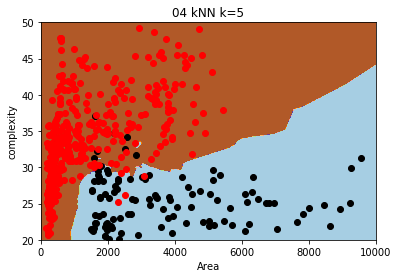

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure()
subfig = fig.add_subplot(1,1,1)
plt.xlim(0, 10000)
plt.ylim(20, 50)

xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 500),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 500))

Z = classifier.predict(np.c_[xx.ravel(), ( yy.ravel() - 20.0 ) * 266.7 ])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

subfig.scatter(car[:,0], car[:,1],color='black')
subfig.scatter(human[:,0], human[:,1],color='red')

subfig.set_title('04 kNN k=' + str(n_neighbors))
subfig.set_xlabel('Area')
subfig.set_ylabel('complexity')

plt.savefig("04_graph.png")
plt.show()

#課題

1. kの値を変化させて，クラスの境界線の変わり方を確認せよ．
2. kNNはすべてのプロトタイプとの距離を計算するため，計算時間がかかる．この対策法として，kd-tree法がある．kd-tree法を調査せよ．

#ヒント

1. 小さすぎるのも，大きすぎるのも良くない．
2. すべてのプロトタイプとの距離を計算する代わりにどうするかに着目しよう．